<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_383675945_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.006)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 383675945
period = 12.8919558735133  # Orbital period in days
epoch = 1687.38603328435
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.4]
folded_lc = folded_lc[folded_lc.time > -0.4]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_383675945_all_sector_lightcurve.csv


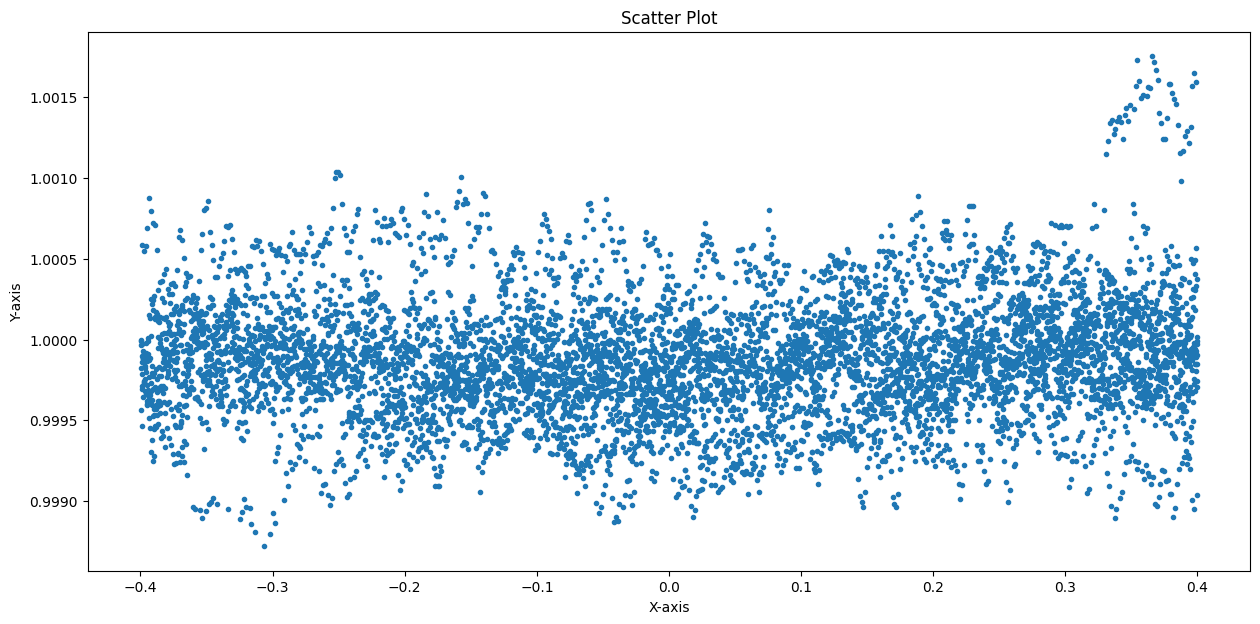

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [9]:
ID = tic_id
sectors = np.array([52, 53, 54, 55, 56, 57, 58, 59, 60]) # <14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 40, 47, 48, 49, 50, >
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-10-e1eb0d5fa617>:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_52, ap_53, ap_54, ap_55, ap_56, ap_57, ap_58, ap_59, ap_60]) # <ap_14, ap_15, ap_16, ap_17, ap_18, ap_19, ap_20, ap_22, ap_23, ap_24, ap_25, ap_26, ap_40, ap_47, ap_48, ap_49, ap_50, >


Sector 52


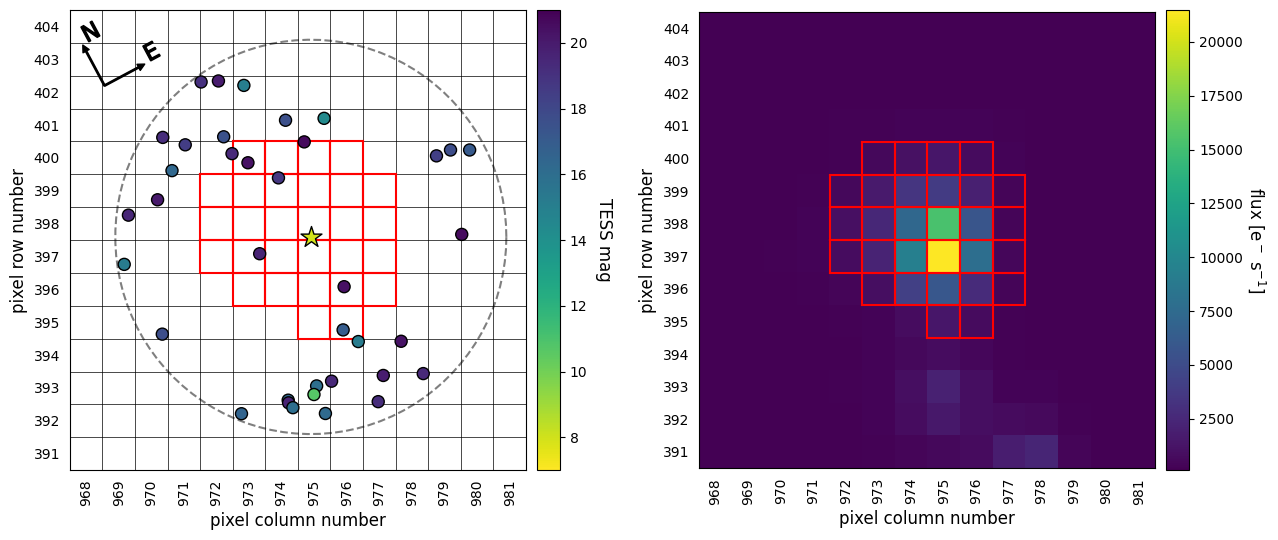

Sector 53


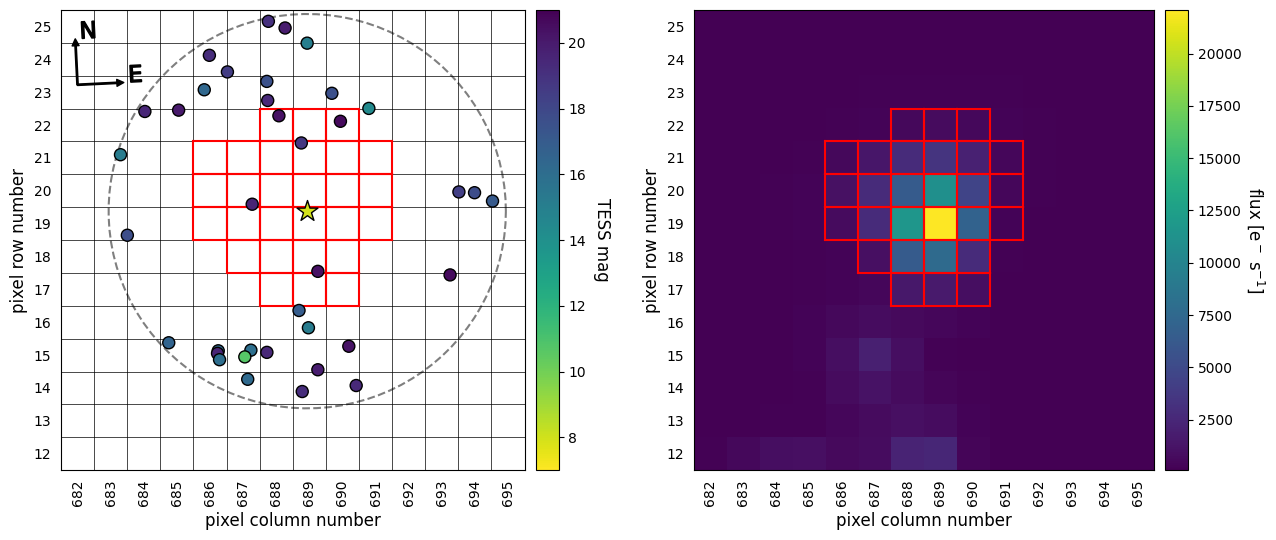

Sector 54


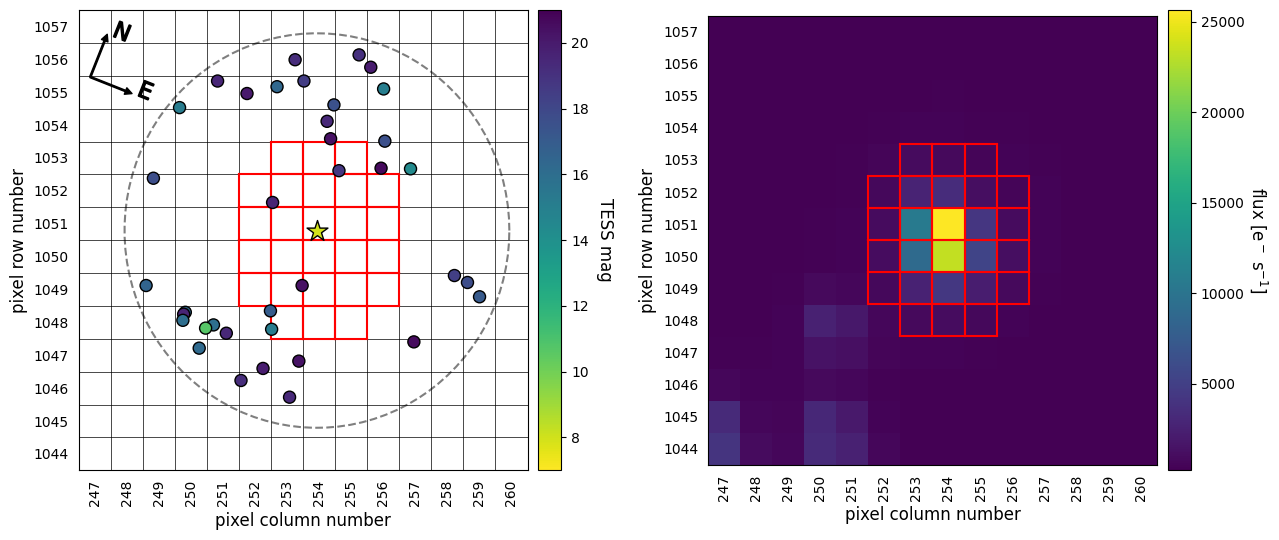

Sector 55


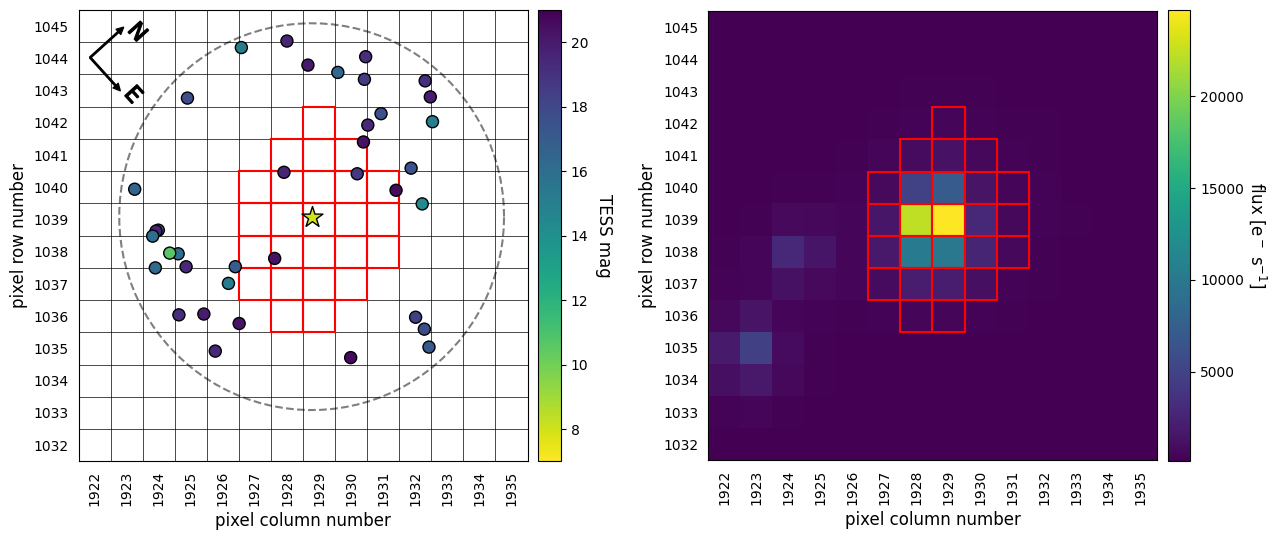

Sector 56


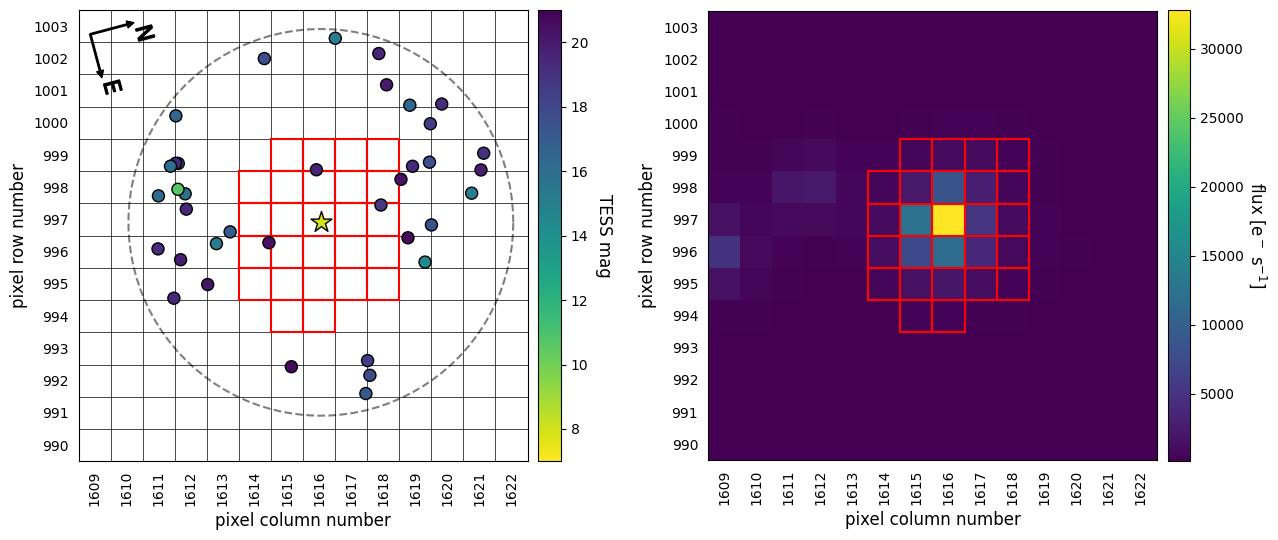

Sector 57


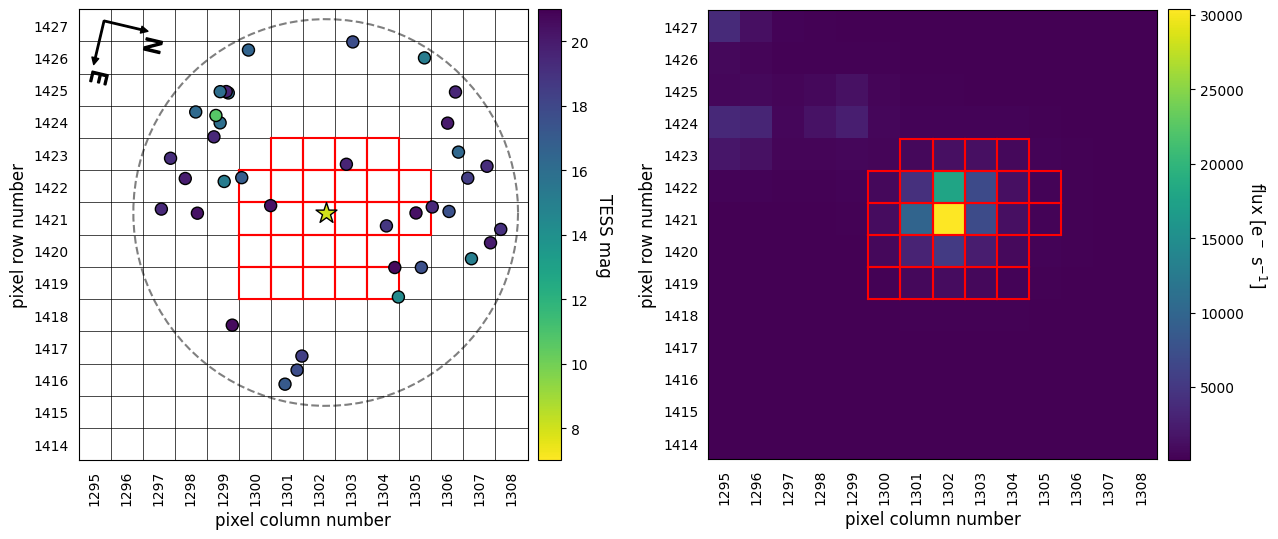

Sector 58


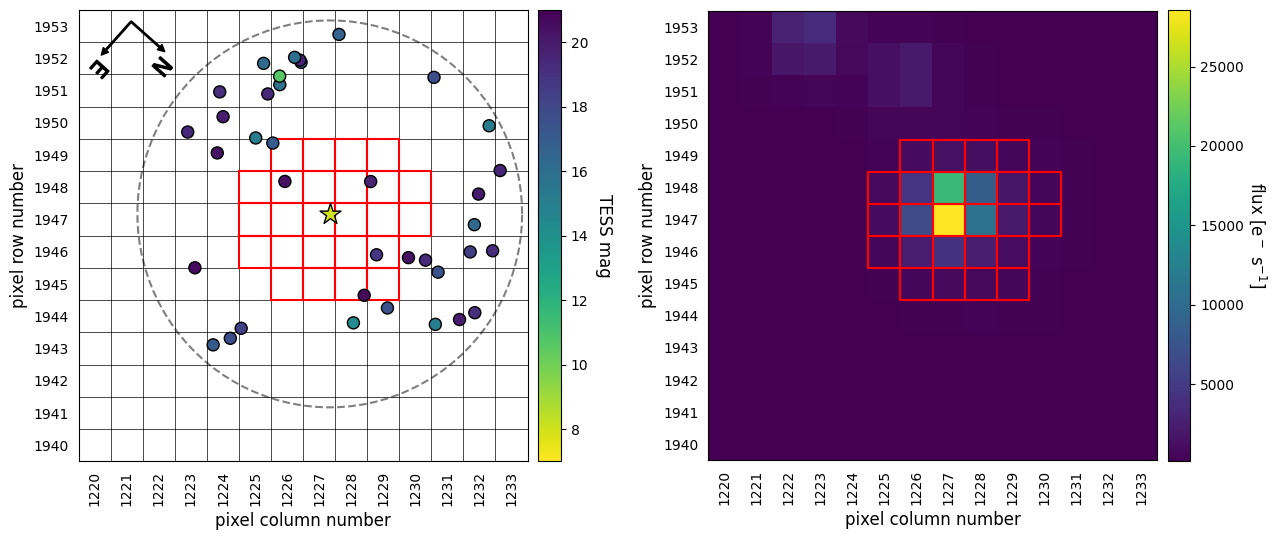

Sector 59


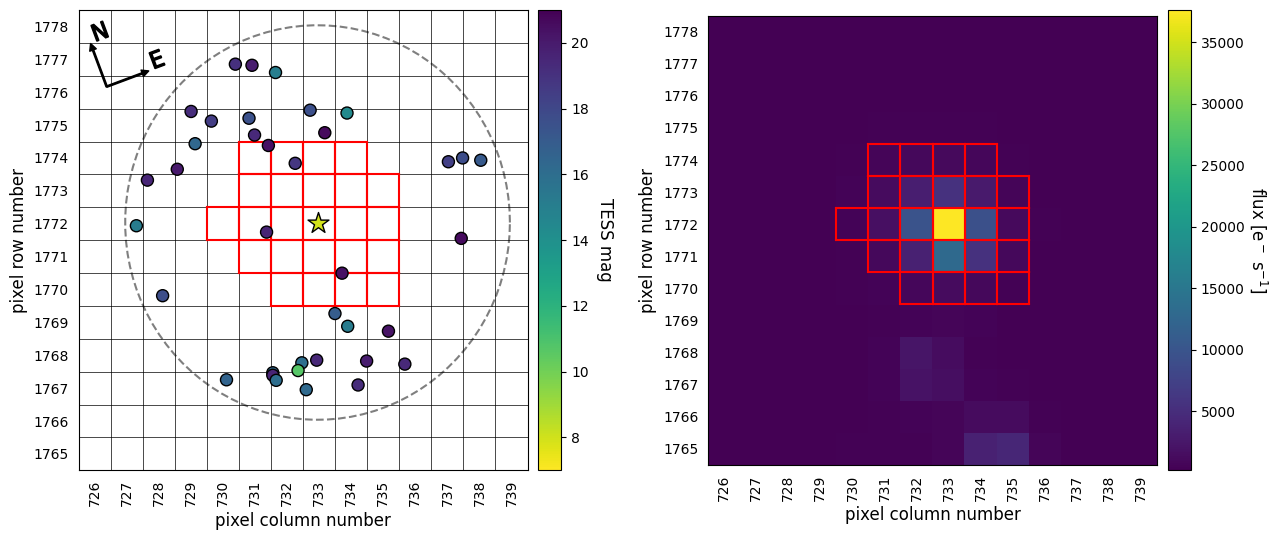

Sector 60


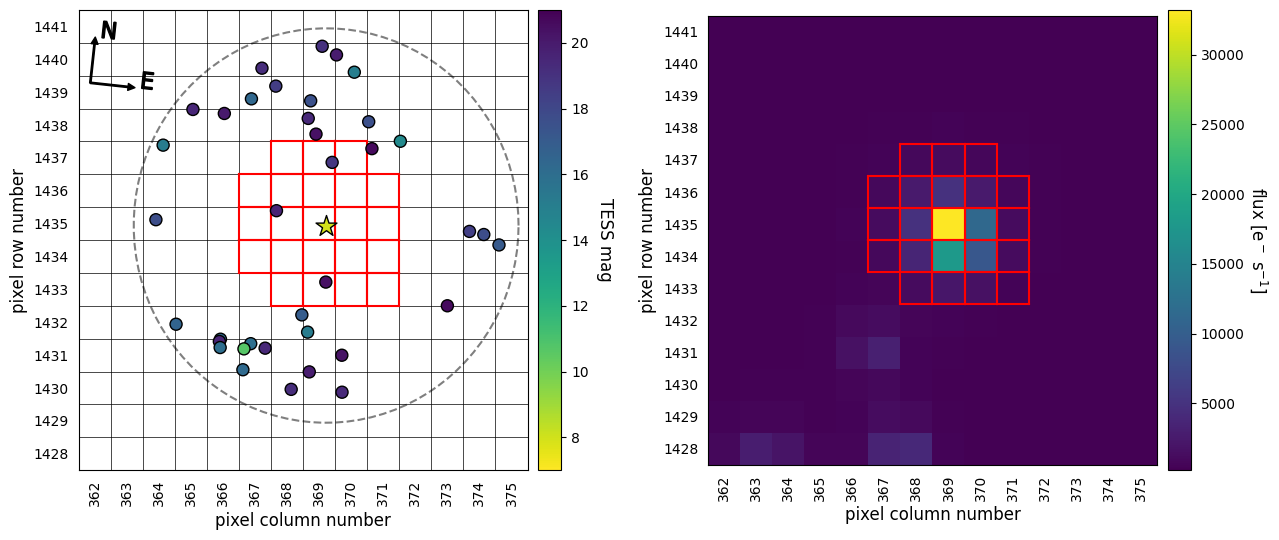

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,383675945,7.9605,7.310,6.996,6.893,279.221476,61.702504,0.970000,0.893171,5519.0,21.764900,0.000,0.000
1,1551515502,19.6181,NaN,NaN,NaN,279.201917,61.704149,NaN,NaN,NaN,-0.053069,33.900,280.070
2,1551515500,20.3520,NaN,NaN,NaN,279.223514,61.692525,NaN,NaN,NaN,-0.880470,36.095,174.468
3,1551515501,18.7716,NaN,NaN,NaN,279.221364,61.713763,NaN,NaN,5949.0,-0.148117,40.531,359.730
4,1551515552,20.6218,NaN,NaN,NaN,279.236062,61.716964,NaN,NaN,NaN,NaN,57.698,25.544
5,1551515504,20.3536,NaN,NaN,NaN,279.214116,61.718433,NaN,NaN,NaN,-1.190530,58.701,347.651
6,383675940,16.9439,15.948,15.677,15.516,279.215597,61.686269,NaN,NaN,NaN,NaN,59.304,189.745
7,383675938,15.1616,14.503,14.150,14.260,279.218464,61.683340,0.980000,0.987939,5542.0,0.716282,69.185,184.264
8,1551515503,19.3731,NaN,NaN,NaN,279.210544,61.721049,NaN,NaN,4470.0,0.445698,69.318,344.397
9,1551515551,17.6039,NaN,NaN,NaN,279.233808,61.721642,0.900000,0.536352,5241.0,0.430022,72.036,16.976


In [10]:
# ap_14 = np.array([[2044.0, 232.0], [2044.0, 233.0], [2044.0, 234.0], [2044.0, 235.0],
#       [2044.0, 236.0], [2045.0, 231.0], [2045.0, 232.0], [2045.0, 233.0], [2045.0,
#         234.0], [2045.0, 235.0], [2045.0, 236.0], [2046.0, 231.0], [2046.0, 232.0],
#       [2046.0, 233.0], [2046.0, 234.0], [2046.0, 235.0], [2046.0, 236.0], [2046.0,
#         237.0], [2047.0, 231.0], [2047.0, 232.0], [2047.0, 233.0], [2047.0, 234.0],
#       [2047.0, 235.0], [2047.0, 236.0], [2048.0, 232.0], [2048.0, 233.0], [2048.0,
#         234.0], [2048.0, 235.0], [2048.0, 236.0], [2049.0, 234.0]])
# ap_15 = np.array([[379.0, 165.0],
#       [379.0, 166.0], [379.0, 167.0], [380.0, 164.0], [380.0, 165.0], [380.0, 166.0],
#       [380.0, 167.0], [380.0, 168.0], [381.0, 163.0], [381.0, 164.0], [381.0, 165.0],
#       [381.0, 166.0], [381.0, 167.0], [381.0, 168.0], [382.0, 163.0], [382.0, 164.0],
#       [382.0, 165.0], [382.0, 166.0], [382.0, 167.0], [382.0, 168.0], [383.0, 163.0],
#       [383.0, 164.0], [383.0, 165.0], [383.0, 166.0], [383.0, 167.0], [383.0, 168.0],
#       [384.0, 165.0], [384.0, 166.0], [384.0, 167.0]])
# ap_16 = np.array([[1338.0, 125.0], [1338.0,
#         126.0], [1338.0, 127.0], [1338.0, 128.0], [1338.0, 129.0], [1338.0, 130.0],
#       [1339.0, 125.0], [1339.0, 126.0], [1339.0, 127.0], [1339.0, 128.0], [1339.0,
#         129.0], [1339.0, 130.0], [1340.0, 125.0], [1340.0, 126.0], [1340.0, 127.0],
#       [1340.0, 128.0], [1340.0, 129.0], [1340.0, 130.0], [1341.0, 126.0], [1341.0,
#         127.0], [1341.0, 128.0], [1341.0, 129.0], [1341.0, 130.0], [1342.0, 127.0],
#       [1342.0, 128.0], [1342.0, 129.0], [1343.0, 128.0]])
# ap_17 = np.array([[1121.0, 1771.0], [
#         1121.0, 1772.0], [1121.0, 1773.0], [1122.0, 1770.0], [1122.0, 1771.0], [1122.0,
#         1772.0], [1122.0, 1773.0], [1122.0, 1774.0], [1123.0, 1770.0], [1123.0, 1771.0],
#       [1123.0, 1772.0], [1123.0, 1773.0], [1123.0, 1774.0], [1124.0, 1770.0], [1124.0,
#         1771.0], [1124.0, 1772.0], [1124.0, 1773.0], [1124.0, 1774.0], [1124.0, 1775.0],
#       [1125.0, 1771.0], [1125.0, 1772.0], [1125.0, 1773.0], [1125.0, 1774.0], [1126.0,
#         1772.0], [1126.0, 1773.0]])
# ap_18 = np.array([[1048.0, 1955.0], [1048.0, 1956.0], [1049.0,
#         1954.0], [1049.0, 1955.0], [1049.0, 1956.0], [1049.0, 1957.0], [1050.0, 1954.0],
#       [1050.0, 1955.0], [1050.0, 1956.0], [1050.0, 1957.0], [1050.0, 1958.0], [1051.0,
#         1954.0], [1051.0, 1955.0], [1051.0, 1956.0], [1051.0, 1957.0], [1051.0, 1958.0],
#       [1052.0, 1954.0], [1052.0, 1955.0], [1052.0, 1956.0], [1052.0, 1957.0], [1052.0,
#         1958.0], [1053.0, 1954.0], [1053.0, 1955.0], [1053.0, 1956.0], [1053.0, 1957.0]])
# ap_19 = np.array([[870.0, 1499.0], [870.0, 1500.0], [870.0, 1501.0], [870.0, 1502.0], [871.0,
#         1499.0], [871.0, 1500.0], [871.0, 1501.0], [871.0, 1502.0], [871.0, 1503.0],
#       [872.0, 1498.0], [872.0, 1499.0], [872.0, 1500.0], [872.0, 1501.0], [872.0,
#         1502.0], [872.0, 1503.0], [873.0, 1498.0], [873.0, 1499.0], [873.0, 1500.0],
#       [873.0, 1501.0], [873.0, 1502.0], [874.0, 1499.0], [874.0, 1500.0], [874.0,
#         1501.0], [874.0, 1502.0]])
# ap_20 = np.array([[486.0, 1159.0], [486.0, 1160.0], [486.0,
#         1161.0], [487.0, 1158.0], [487.0, 1159.0], [487.0, 1160.0], [487.0, 1161.0],
#       [487.0, 1162.0], [488.0, 1157.0], [488.0, 1158.0], [488.0, 1159.0], [488.0,
#         1160.0], [488.0, 1161.0], [488.0, 1162.0], [489.0, 1157.0], [489.0, 1158.0],
#       [489.0, 1159.0], [489.0, 1160.0], [489.0, 1161.0], [489.0, 1162.0], [490.0,
#         1158.0], [490.0, 1159.0], [490.0, 1160.0], [490.0, 1161.0], [491.0, 1159.0]])
# ap_22 = np.array([[1603.0, 1180.0], [1603.0, 1181.0], [1603.0, 1182.0], [1603.0, 1183.0], [
#         1604.0, 1179.0], [1604.0, 1180.0], [1604.0, 1181.0], [1604.0, 1182.0], [1604.0,
#         1183.0], [1604.0, 1184.0], [1605.0, 1179.0], [1605.0, 1180.0], [1605.0, 1181.0],
#       [1605.0, 1182.0], [1605.0, 1183.0], [1605.0, 1184.0], [1606.0, 1180.0], [1606.0,
#         1181.0], [1606.0, 1182.0], [1606.0, 1183.0], [1606.0, 1184.0], [1607.0, 1180.0],
#       [1607.0, 1181.0], [1607.0, 1182.0], [1607.0, 1183.0], [1607.0, 1184.0]])
# ap_23 = np.array([[1227.0, 1549.0], [1227.0, 1550.0], [1227.0, 1551.0], [1228.0, 1548.0], [1228.0,
#         1549.0], [1228.0, 1550.0], [1228.0, 1551.0], [1228.0, 1552.0], [1229.0, 1548.0],
#       [1229.0, 1549.0], [1229.0, 1550.0], [1229.0, 1551.0], [1229.0, 1552.0], [1229.0,
#         1553.0], [1230.0, 1548.0], [1230.0, 1549.0], [1230.0, 1550.0], [1230.0, 1551.0],
#       [1230.0, 1552.0], [1230.0, 1553.0], [1231.0, 1549.0], [1231.0, 1550.0], [1231.0,
#         1551.0], [1231.0, 1552.0], [1232.0, 1550.0], [1232.0, 1551.0]])
# ap_24 = np.array([[1070.0,
#         970.0], [1070.0, 971.0], [1071.0, 969.0], [1071.0, 970.0], [1071.0, 971.0],
#       [1071.0, 972.0], [1071.0, 973.0], [1072.0, 969.0], [1072.0, 970.0], [1072.0,
#         971.0], [1072.0, 972.0], [1072.0, 973.0], [1073.0, 968.0], [1073.0, 969.0],
#       [1073.0, 970.0], [1073.0, 971.0], [1073.0, 972.0], [1073.0, 973.0], [1074.0,
#         968.0], [1074.0, 969.0], [1074.0, 970.0], [1074.0, 971.0], [1074.0, 972.0],
#       [1074.0, 973.0], [1075.0, 969.0], [1075.0, 970.0], [1075.0, 971.0], [1075.0,
#         972.0], [1075.0, 973.0]])
# ap_25 = np.array([[1004.0, 474.0], [1004.0, 475.0], [1004.0,
#         476.0], [1005.0, 473.0], [1005.0, 474.0], [1005.0, 475.0], [1005.0, 476.0],
#       [1005.0, 477.0], [1006.0, 473.0], [1006.0, 474.0], [1006.0, 475.0], [1006.0,
#         476.0], [1006.0, 477.0], [1007.0, 472.0], [1007.0, 473.0], [1007.0, 474.0],
#       [1007.0, 475.0], [1007.0, 476.0], [1007.0, 477.0], [1008.0, 472.0], [1008.0,
#         473.0], [1008.0, 474.0], [1008.0, 475.0], [1008.0, 476.0], [1008.0, 477.0],
#       [1009.0, 473.0], [1009.0, 474.0], [1009.0, 475.0], [1009.0, 476.0]])
# ap_26 = np.array([[739.0, 67.0], [739.0, 68.0], [739.0, 69.0], [740.0, 66.0], [740.0, 67.0],
#       [740.0, 68.0], [740.0, 69.0], [740.0, 70.0], [741.0, 66.0], [741.0, 67.0], [
#         741.0, 68.0], [741.0, 69.0], [741.0, 70.0], [742.0, 65.0], [742.0, 66.0],
#       [742.0, 67.0], [742.0, 68.0], [742.0, 69.0], [742.0, 70.0], [743.0, 65.0], [
#         743.0, 66.0], [743.0, 67.0], [743.0, 68.0], [743.0, 69.0], [743.0, 70.0],
#       [744.0, 67.0], [744.0, 68.0], [744.0, 69.0]])
# ap_40 = np.array([[1651.0, 112.0], [1651.0,
#         113.0], [1651.0, 114.0], [1651.0, 115.0], [1651.0, 116.0], [1652.0, 111.0],
#       [1652.0, 112.0], [1652.0, 113.0], [1652.0, 114.0], [1652.0, 115.0], [1652.0,
#         116.0], [1652.0, 117.0], [1653.0, 111.0], [1653.0, 112.0], [1653.0, 113.0],
#       [1653.0, 114.0], [1653.0, 115.0], [1653.0, 116.0], [1654.0, 111.0], [1654.0,
#         112.0], [1654.0, 113.0], [1654.0, 114.0], [1654.0, 115.0], [1654.0, 116.0],
#       [1655.0, 112.0], [1655.0, 113.0], [1655.0, 114.0], [1655.0, 115.0], [1656.0,
#         114.0], [1656.0, 115.0]])
# ap_47 = np.array([[359.0, 1102.0], [359.0, 1103.0], [359.0, 1104.0],
#       [360.0, 1101.0], [360.0, 1102.0], [360.0, 1103.0], [360.0, 1104.0], [360.0,
#         1105.0], [361.0, 1100.0], [361.0, 1101.0], [361.0, 1102.0], [361.0, 1103.0],
#       [361.0, 1104.0], [361.0, 1105.0], [362.0, 1100.0], [362.0, 1101.0], [362.0,
#         1102.0], [362.0, 1103.0], [362.0, 1104.0], [362.0, 1105.0], [363.0, 1101.0],
#       [363.0, 1102.0], [363.0, 1103.0], [363.0, 1104.0]])
# ap_48 = np.array([[1979.0, 1046.0], [1979.0, 1047.0], [1979.0, 1048.0], [1979.0, 1049.0], [1980.0, 1045.0], [1980.0,
#         1046.0], [1980.0, 1047.0], [1980.0, 1048.0], [1980.0, 1049.0], [1980.0, 1050.0],
#       [1981.0, 1045.0], [1981.0, 1046.0], [1981.0, 1047.0], [1981.0, 1048.0], [1981.0,
#         1049.0], [1981.0, 1050.0], [1982.0, 1046.0], [1982.0, 1047.0], [1982.0, 1048.0],
#       [1982.0, 1049.0], [1982.0, 1050.0], [1983.0, 1046.0], [1983.0, 1047.0], [1983.0,
#         1048.0], [1983.0, 1049.0]])
# ap_49 = np.array([[1486.0, 1260.0], [1487.0, 1258.0], [1487.0,
#         1259.0], [1487.0, 1260.0], [1487.0, 1261.0], [1487.0, 1262.0], [1488.0, 1258.0],
#       [1488.0, 1259.0], [1488.0, 1260.0], [1488.0, 1261.0], [1488.0, 1262.0], [1488.0,
#         1263.0], [1489.0, 1258.0], [1489.0, 1259.0], [1489.0, 1260.0], [1489.0, 1261.0],
#       [1489.0, 1262.0], [1489.0, 1263.0], [1490.0, 1258.0], [1490.0, 1259.0], [1490.0,
#         1260.0], [1490.0, 1261.0], [1490.0, 1262.0], [1490.0, 1263.0], [1491.0, 1260.0],
#       [1491.0, 1261.0], [1491.0, 1262.0]])
# ap_50 = np.array([[1167.0, 1660.0], [1167.0, 1661.0],
#       [1168.0, 1659.0], [1168.0, 1660.0], [1168.0, 1661.0], [1168.0, 1662.0], [1168.0,
#         1663.0], [1169.0, 1659.0], [1169.0, 1660.0], [1169.0, 1661.0], [1169.0, 1662.0],
#       [1169.0, 1663.0], [1170.0, 1659.0], [1170.0, 1660.0], [1170.0, 1661.0], [1170.0,
#         1662.0], [1170.0, 1663.0], [1170.0, 1664.0], [1171.0, 1659.0], [1171.0, 1660.0],
#       [1171.0, 1661.0], [1171.0, 1662.0], [1171.0, 1663.0], [1172.0, 1660.0], [1172.0,
#         1661.0], [1172.0, 1662.0], [1172.0, 1663.0]])
ap_52 = np.array([[972.0, 397.0], [972.0,
        398.0], [972.0, 399.0], [973.0, 396.0], [973.0, 397.0], [973.0, 398.0], [
        973.0, 399.0], [973.0, 400.0], [974.0, 396.0], [974.0, 397.0], [974.0, 398.0],
      [974.0, 399.0], [974.0, 400.0], [975.0, 395.0], [975.0, 396.0], [975.0, 397.0],
      [975.0, 398.0], [975.0, 399.0], [975.0, 400.0], [976.0, 395.0], [976.0, 396.0],
      [976.0, 397.0], [976.0, 398.0], [976.0, 399.0], [976.0, 400.0], [977.0, 396.0],
      [977.0, 397.0], [977.0, 398.0], [977.0, 399.0]])
ap_53 = np.array([[686.0, 19.0], [686.0,
        20.0], [686.0, 21.0], [687.0, 18.0], [687.0, 19.0], [687.0, 20.0], [687.0,
        21.0], [688.0, 17.0], [688.0, 18.0], [688.0, 19.0], [688.0, 20.0], [688.0,
        21.0], [688.0, 22.0], [689.0, 17.0], [689.0, 18.0], [689.0, 19.0], [689.0,
        20.0], [689.0, 21.0], [689.0, 22.0], [690.0, 17.0], [690.0, 18.0], [690.0,
        19.0], [690.0, 20.0], [690.0, 21.0], [690.0, 22.0], [691.0, 19.0], [691.0,
        20.0], [691.0, 21.0]])
ap_54 = np.array([[252.0, 1049.0], [252.0, 1050.0], [252.0, 1051.0],
      [252.0, 1052.0], [253.0, 1048.0], [253.0, 1049.0], [253.0, 1050.0], [253.0,
        1051.0], [253.0, 1052.0], [253.0, 1053.0], [254.0, 1048.0], [254.0, 1049.0],
      [254.0, 1050.0], [254.0, 1051.0], [254.0, 1052.0], [254.0, 1053.0], [255.0,
        1048.0], [255.0, 1049.0], [255.0, 1050.0], [255.0, 1051.0], [255.0, 1052.0],
      [255.0, 1053.0], [256.0, 1049.0], [256.0, 1050.0], [256.0, 1051.0], [256.0,
        1052.0]])
ap_55 = np.array([[1927.0, 1037.0], [1927.0, 1038.0], [1927.0, 1039.0], [1927.0,
        1040.0], [1928.0, 1036.0], [1928.0, 1037.0], [1928.0, 1038.0], [1928.0, 1039.0],
      [1928.0, 1040.0], [1928.0, 1041.0], [1929.0, 1036.0], [1929.0, 1037.0], [1929.0,
        1038.0], [1929.0, 1039.0], [1929.0, 1040.0], [1929.0, 1041.0], [1929.0, 1042.0],
      [1930.0, 1037.0], [1930.0, 1038.0], [1930.0, 1039.0], [1930.0, 1040.0], [1930.0,
        1041.0], [1931.0, 1038.0], [1931.0, 1039.0], [1931.0, 1040.0]])
ap_56 = np.array([[1614.0,
        995.0], [1614.0, 996.0], [1614.0, 997.0], [1614.0, 998.0], [1615.0, 994.0],
      [1615.0, 995.0], [1615.0, 996.0], [1615.0, 997.0], [1615.0, 998.0], [1615.0,
        999.0], [1616.0, 994.0], [1616.0, 995.0], [1616.0, 996.0], [1616.0, 997.0],
      [1616.0, 998.0], [1616.0, 999.0], [1617.0, 995.0], [1617.0, 996.0], [1617.0,
        997.0], [1617.0, 998.0], [1617.0, 999.0], [1618.0, 995.0], [1618.0, 996.0],
      [1618.0, 997.0], [1618.0, 998.0], [1618.0, 999.0]])
ap_57 = np.array([[1300.0, 1419.0], [
        1300.0, 1420.0], [1300.0, 1421.0], [1300.0, 1422.0], [1301.0, 1419.0], [1301.0,
        1420.0], [1301.0, 1421.0], [1301.0, 1422.0], [1301.0, 1423.0], [1302.0, 1419.0],
      [1302.0, 1420.0], [1302.0, 1421.0], [1302.0, 1422.0], [1302.0, 1423.0], [1303.0,
        1419.0], [1303.0, 1420.0], [1303.0, 1421.0], [1303.0, 1422.0], [1303.0, 1423.0],
      [1304.0, 1419.0], [1304.0, 1420.0], [1304.0, 1421.0], [1304.0, 1422.0], [1304.0,
        1423.0], [1305.0, 1421.0], [1305.0, 1422.0]])
ap_58 = np.array([[1225.0, 1946.0], [1225.0,
        1947.0], [1225.0, 1948.0], [1226.0, 1945.0], [1226.0, 1946.0], [1226.0, 1947.0],
      [1226.0, 1948.0], [1226.0, 1949.0], [1227.0, 1945.0], [1227.0, 1946.0], [1227.0,
        1947.0], [1227.0, 1948.0], [1227.0, 1949.0], [1228.0, 1945.0], [1228.0, 1946.0],
      [1228.0, 1947.0], [1228.0, 1948.0], [1228.0, 1949.0], [1229.0, 1945.0], [1229.0,
        1946.0], [1229.0, 1947.0], [1229.0, 1948.0], [1229.0, 1949.0], [1230.0, 1947.0],
      [1230.0, 1948.0]])
ap_59 = np.array([[730.0, 1772.0], [731.0, 1771.0], [731.0, 1772.0], [
        731.0, 1773.0], [731.0, 1774.0], [732.0, 1770.0], [732.0, 1771.0], [732.0,
        1772.0], [732.0, 1773.0], [732.0, 1774.0], [733.0, 1770.0], [733.0, 1771.0],
      [733.0, 1772.0], [733.0, 1773.0], [733.0, 1774.0], [734.0, 1770.0], [734.0,
        1771.0], [734.0, 1772.0], [734.0, 1773.0], [734.0, 1774.0], [735.0, 1770.0],
      [735.0, 1771.0], [735.0, 1772.0], [735.0, 1773.0]])
ap_60 = np.array([[367.0, 1434.0], [
        367.0, 1435.0], [367.0, 1436.0], [368.0, 1433.0], [368.0, 1434.0], [368.0,
        1435.0], [368.0, 1436.0], [368.0, 1437.0], [369.0, 1433.0], [369.0, 1434.0],
      [369.0, 1435.0], [369.0, 1436.0], [369.0, 1437.0], [370.0, 1433.0], [370.0,
        1434.0], [370.0, 1435.0], [370.0, 1436.0], [370.0, 1437.0], [371.0, 1433.0],
      [371.0, 1434.0], [371.0, 1435.0], [371.0, 1436.0]])

apertures = np.array([ap_52, ap_53, ap_54, ap_55, ap_56, ap_57, ap_58, ap_59, ap_60]) # <ap_14, ap_15, ap_16, ap_17, ap_18, ap_19, ap_20, ap_22, ap_23, ap_24, ap_25, ap_26, ap_40, ap_47, ap_48, ap_49, ap_50, >
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [13]:
tdepth = 0.143 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,383675945,7.9605,7.310,6.996,6.893,279.221476,61.702504,0.970000,0.893171,5519.0,21.764900,0.000,0.000,9.985033e-01,0.000143
1,1551515502,19.6181,NaN,NaN,NaN,279.201917,61.704149,NaN,NaN,NaN,-0.053069,33.900,280.070,1.950535e-05,0.000000
2,1551515500,20.3520,NaN,NaN,NaN,279.223514,61.692525,NaN,NaN,NaN,-0.880470,36.095,174.468,9.854976e-06,0.000000
3,1551515501,18.7716,NaN,NaN,NaN,279.221364,61.713763,NaN,NaN,5949.0,-0.148117,40.531,359.730,3.936499e-05,0.000000
4,1551515552,20.6218,NaN,NaN,NaN,279.236062,61.716964,NaN,NaN,NaN,NaN,57.698,25.544,3.931152e-06,0.000000
5,1551515504,20.3536,NaN,NaN,NaN,279.214116,61.718433,NaN,NaN,NaN,-1.190530,58.701,347.651,5.363931e-06,0.000000
6,383675940,16.9439,15.948,15.677,15.516,279.215597,61.686269,NaN,NaN,NaN,NaN,59.304,189.745,1.053692e-04,0.000000
7,383675938,15.1616,14.503,14.150,14.260,279.218464,61.683340,0.980000,0.987939,5542.0,0.716282,69.185,184.264,2.917544e-04,0.490138
8,1551515503,19.3731,NaN,NaN,NaN,279.210544,61.721049,NaN,NaN,4470.0,0.445698,69.318,344.397,7.200518e-06,0.000000
9,1551515551,17.6039,NaN,NaN,NaN,279.233808,61.721642,0.900000,0.536352,5241.0,0.430022,72.036,16.976,2.316148e-05,0.000000


In [29]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 383675945.
Calculating EB and EBx2P scenario probabilities for 383675945.
Calculating PTP scenario probability for 383675945.
Calculating PEB and PEBx2P scenario probabilities for 383675945.
Calculating STP scenario probability for 383675945.
Calculating SEB and SEBx2P scenario probabilities for 383675945.
Calculating DTP scenario probability for 383675945.
Calculating DEB and DEBx2P scenario probabilities for 383675945.
Calculating BTP scenario probability for 383675945.
Calculating BEB and BEBx2P scenario probabilities for 383675945.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 383675938.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 383675953.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 383675933.
CPU times: user 1min 48s, sys: 2.98 s, total: 1min 51s
Wall time: 1min 28s


In [30]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 1.0
NFPP = 0.99999996


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,383675945,TP,0.970000,0.893171,12.891956,89.380707,0.136994,0.735141,185.480329,1.255407,0.000000,0.000000,9.930648e-53
1,383675945,EB,0.970000,0.893171,12.891956,86.110854,1.820375,0.161879,52.081379,0.000000,0.757126,0.786951,3.811071e-228
2,383675945,EBx2P,0.970000,0.893171,25.783912,88.519002,0.654475,0.636142,161.525923,0.000000,0.950082,0.893171,8.295996e-192
3,383675945,PTP,0.970000,0.893171,12.891956,89.575488,0.045123,0.873479,180.128229,1.079632,0.000000,0.000000,1.509820e-24
4,383675945,PEB,0.970000,0.893171,12.891956,86.053914,1.867917,0.159352,51.096986,0.000000,0.794596,0.821911,2.235056e-230
5,383675945,PEBx2P,0.970000,0.893171,25.783912,88.726915,0.518154,0.749717,183.145172,0.000000,0.944913,0.893171,2.336547e-189
6,383675945,STP,0.598686,0.595549,12.891956,89.987298,0.001592,0.907722,192.550412,2.994756,0.000000,0.000000,2.035488e-18
7,383675945,SEB,0.100654,0.120938,12.891956,88.879296,0.124569,0.977183,200.648693,0.000000,0.012478,0.100000,2.923496e-149
8,383675945,SEBx2P,0.125900,0.154235,25.783912,89.574504,0.299985,0.903787,200.645911,0.000000,0.125320,0.153528,2.391801e-116
9,383675945,DTP,0.970000,0.893171,12.891956,89.929642,0.010549,0.824401,183.037181,1.093105,0.000000,0.000000,5.476463e-23


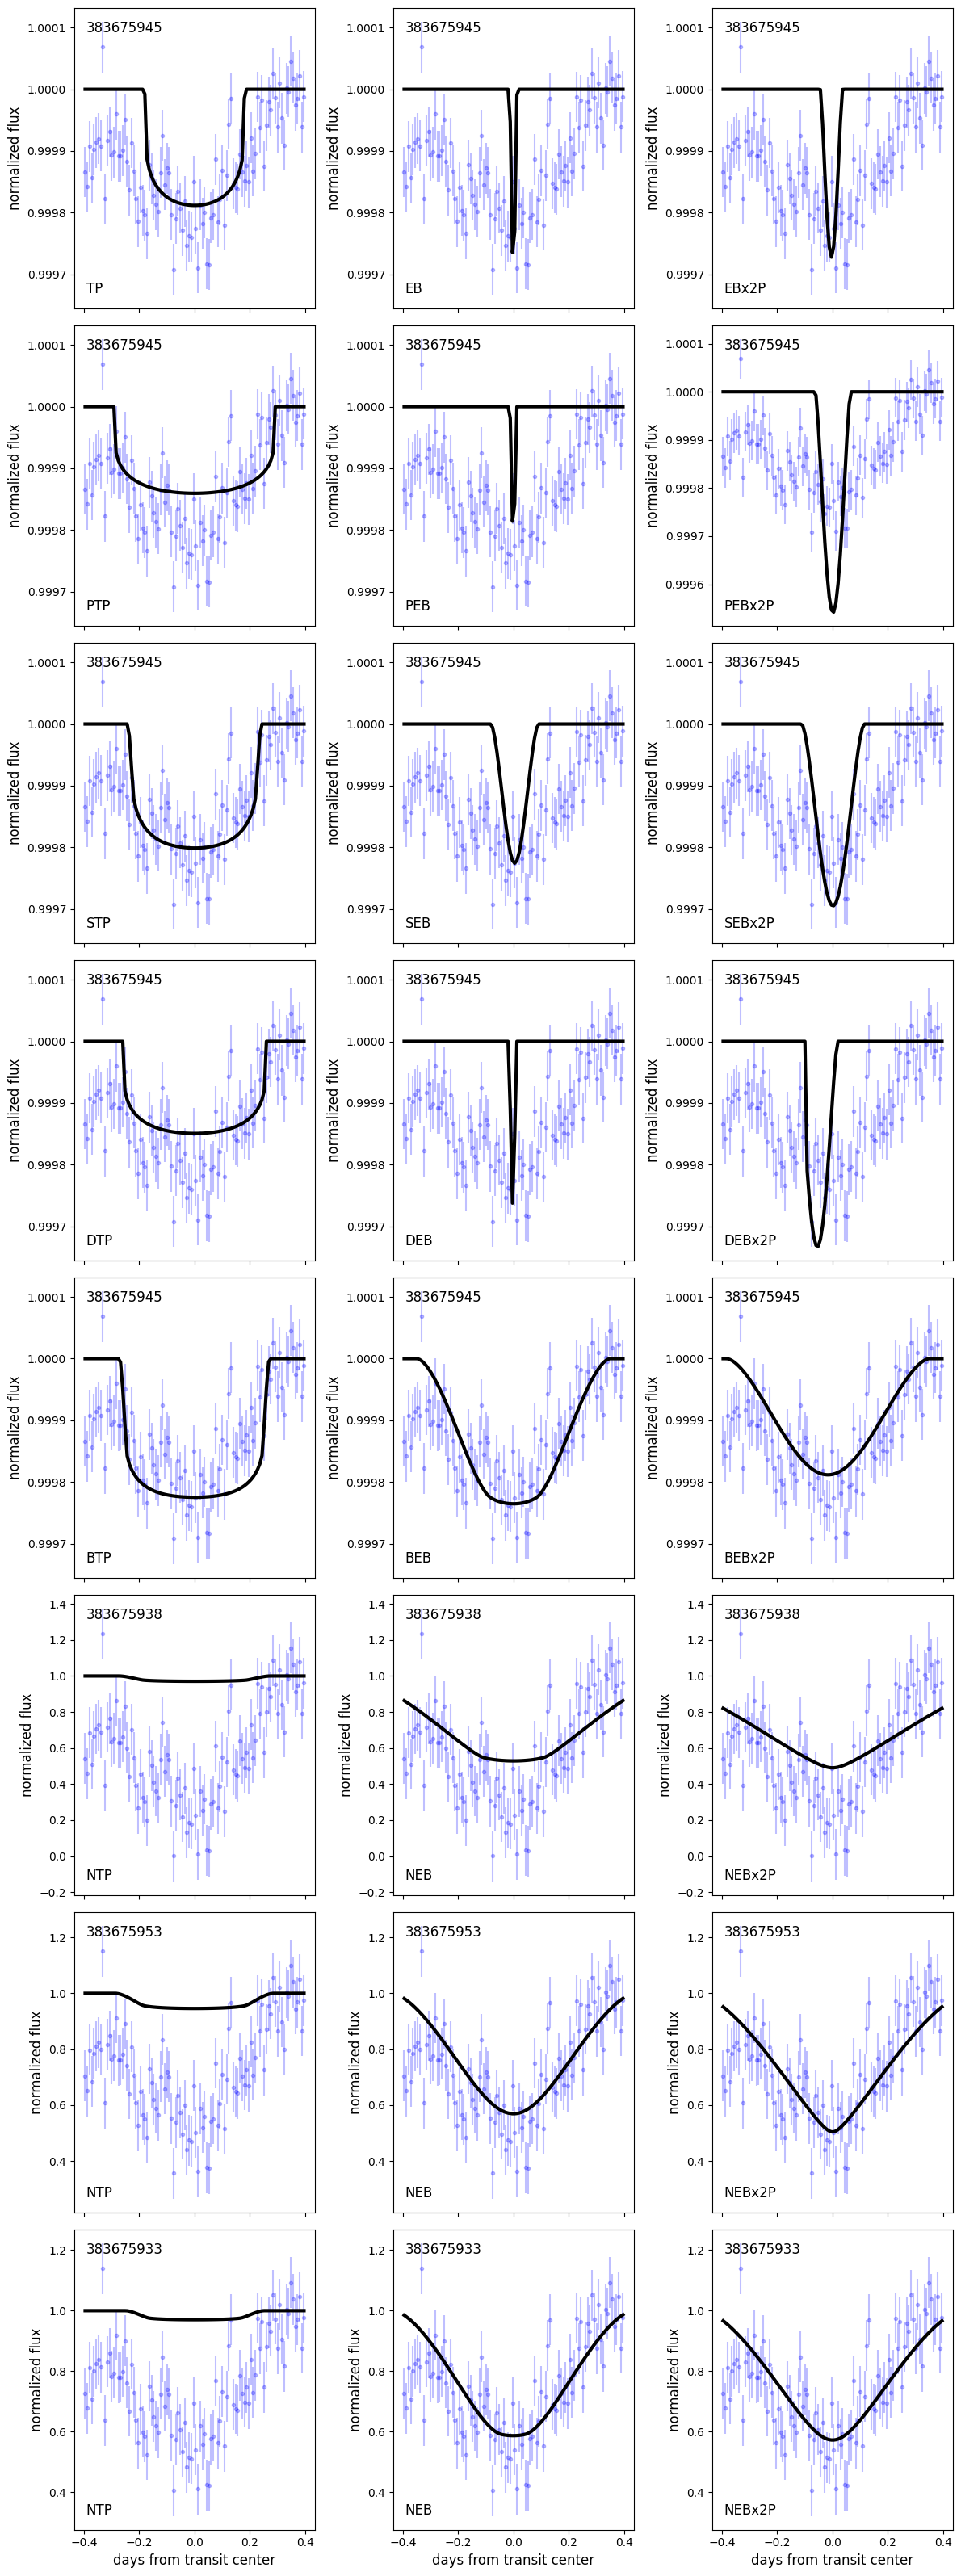

In [31]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [32]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.9999999999999998 +/- 2.830524433501838e-16
NFPP = 0.8232715908265898 +/- 0.32347458256415446
CPU times: user 36min 24s, sys: 50.5 s, total: 37min 15s
Wall time: 29min 16s


Our final conclusion about this specified planet of TIC 383675945 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).